In [1]:
from twifex import *
from tqdm import tqdm
from pprint import pprint
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
twifex = Twifex()

In [3]:
new_sample = twifex.single_tweet("./tests/new_tweets/1430039919179837446.json")

In [4]:
path1 = "./tests/new_tweets/"
path2 = "./tests/people_timeline/"

In [14]:
new_tweets = []
for file in tqdm([i for i in os.listdir(path1) if os.path.isfile(path1+i)]):
    if ".json" in file:
        new_tweets.append(twifex.single_tweet(path1+file)) 
    else:
        pass

100%|████████████████████████████████████████████████████████████████████████████| 1687/1687 [00:00<00:00, 4333.91it/s]


In [12]:
timeline_tweets = []
for file in tqdm([i for i in os.listdir(path2) if os.path.isfile(path2+i)]):
    if ".json" in file:
        timeline_tweets.append(twifex.single_tweet(path2+file)) 
    else:
        pass

100%|██████████████████████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 3543.33it/s]


In [6]:
len(new_tweets)

1686

In [13]:
len(timeline_tweets)

220

# Tweets with geo locations

In [38]:
geos = []
for t in tqdm(new_tweets):
    if t.get_place() is not None:
        geos.append(t.get_tweet())
    elif t.get_coordinates() is not None:
        geos.append(t.get_tweet())

100%|██████████████████████████████████████████████████████████████████████████| 1906/1906 [00:00<00:00, 643615.12it/s]


In [39]:
len(geos)

32

In [7]:
# geos[0]

# Single tweet features

In [16]:
ent = []
for tweet in tqdm(new_tweets):
    ent.append(tweet.get_text())

100%|██████████████████████████████████████████████████████████████████████████| 1906/1906 [00:00<00:00, 738985.34it/s]


In [20]:
ent[1200]

'Her: where you from\nMe: Gambia\nHer: I from Somalia\nMe: Whats yo name?\nHer: Faiser\nMe: Faiser?? Like the vaccine Pfizer?\nHer: Fuck you🖕🏾\nMe: https://t.co/coz1K9r3Hl'

# Network features

In [48]:
p = twifex.collective_tweets(timeline_tweets).topology_based_features().time_independent_features().time_independent_location_independent_network_features().tweet_features()

In [61]:
p.network_building(network_type="retweet")

In [62]:
# p.make_reply_network()

In [63]:
# p.make_retweet_network()

In [64]:
# p.make_quote_network()

In [65]:
# nx.draw(rt, with_labels=True, font_weight='bold')

In [66]:
# nx.draw(rt)

In [67]:
p.network_type

'retweet'

In [68]:
# p.tweet_length_layer()

In [69]:
p.tweet_length_layer()

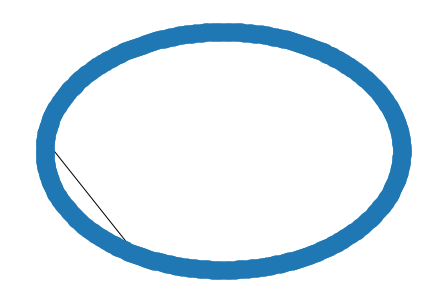

In [70]:
# nx.draw_circular(p.get_network(), with_labels=True, font_weight='bold')
nx.draw_circular(p.get_network())

In [59]:
len(p.get_network().nodes)

254

In [73]:
q = []
for e in timeline_tweets:
    if e.is_quoted():
        q.append(e)

In [72]:
len(q)

125

In [6]:
p = twix.collective_tweets(new_tweets).mass_based_features().time_dependent_features().time_dependent_location_dependent_mass_features().tweet_features()
q = twix.collective_tweets(new_tweets).mass_based_features().time_dependent_features().time_dependent_location_dependent_mass_features().user_features()

In [7]:
# pprint(p.temporal_spatial_tweets(temporal_resolution="day")["Canada"])

In [8]:
# pprint(p.temporal_spatial_tweets(order='temporal-spatial', temporal_resolution='minute'))

In [9]:
# pprint(p.temporal_spatial_tweet_complexity(temporal_resolution='minute'))

In [10]:
# pprint(p.temporal_spatial_tweet_count(order='temporal-spatial', temporal_resolution='minute', spatial_resolution='country', temporal_frequency=5 ))

In [11]:
# pprint(p.temporal_spatial_tweet_length(order='temporal-spatial', temporal_resolution='minute', spatial_resolution='country', temporal_frequency=2))

In [12]:
# pprint(p.temporal_spatial_tweet_count(order='temporal-spatial', temporal_resolution='minute', spatial_resolution='country', temporal_frequency=2))

In [13]:
# pprint(p.temporal_spatial_tweet_sentiment(order='temporal-spatial', temporal_resolution='minute', spatial_resolution='country', temporal_frequency=2, sentiment_engine="textblob"))

In [14]:
# pprint(p.temporal_spatial_tweet_likes_count(order='temporal-spatial', temporal_resolution='minute', spatial_resolution='country', temporal_frequency=2))

In [15]:
# pprint(p.temporal_spatial_tweet_retweet_count(order='temporal-spatial', temporal_resolution='minute', spatial_resolution='country', temporal_frequency=2))

In [16]:
# pprint(p.temporal_spatial_tweet_language(order='temporal-spatial', temporal_resolution='minute', spatial_resolution='country', temporal_frequency=2))

In [17]:
# pprint(p.temporal_spatial_tweet_language())

In [18]:
# for i in new_tweets:
#     pprint(i.get_emojis(count=False))

In [19]:
# pprint(p.temporal_spatial_tweet_case_analysis(order='temporal-spatial', temporal_resolution='hour', spatial_resolution='country', temporal_frequency=2, unit_of_analysis="word"))

In [20]:
# pprint(q.temporal_spatial_user_friends(order='spatial-temporal', temporal_resolution='day', spatial_resolution='country', temporal_frequency=3))

In [21]:
# pprint(q.temporal_spatial_user_reputation(order='temporal-spatial', temporal_resolution='minute', spatial_resolution='place', temporal_frequency=3))

In [22]:
# pprint(q.temporal_spatial_user_account_age(order='temporal-spatial', temporal_resolution='day', spatial_resolution='country', temporal_frequency=3))

In [23]:
# pprint(q.temporal_spatial_user_total_likes_count(order='temporal-spatial', temporal_resolution='day', spatial_resolution='country', temporal_frequency=3))

In [24]:
# pprint(q.temporal_spatial_user_friends())

In [25]:
# pprint(q.test(functionality="friend_count"))

In [27]:
pprint(q.temporal_spatial_user_status_count(order='temporal-spatial', temporal_resolution='day', spatial_resolution='country', temporal_frequency=3))

{datetime.datetime(2021, 8, 24, 5, 30, 51): {'Australia': {'average': 42734.0,
                                                           'count': 3,
                                                           'max': 114158.0,
                                                           'median': 13284.0,
                                                           'min': 760.0,
                                                           'stdev': 50762.54180659856,
                                                           'sum': 128202.0},
                                             'Canada': {'average': 88838.5,
                                                        'count': 2,
                                                        'max': 156595.0,
                                                        'median': 88838.5,
                                                        'min': 21082.0,
                                                        'stdev': 67756.5,
                     

In [28]:
pprint(q.temporal_spatial_user_analysis(analysis_type="users_status_count", order='temporal-spatial', temporal_resolution='day', spatial_resolution='country', temporal_frequency=3))

{datetime.datetime(2021, 8, 24, 5, 30, 51): {'Australia': {'average': 42734.0,
                                                           'count': 3,
                                                           'max': 114158.0,
                                                           'median': 13284.0,
                                                           'min': 760.0,
                                                           'stdev': 50762.54180659856,
                                                           'sum': 128202.0},
                                             'Canada': {'average': 88838.5,
                                                        'count': 2,
                                                        'max': 156595.0,
                                                        'median': 88838.5,
                                                        'min': 21082.0,
                                                        'stdev': 67756.5,
                     

In [54]:
x = "pop()"

In [55]:
eval('[1,2,3].x')

AttributeError: 'list' object has no attribute 'x'

In [14]:
v = twix.collective_tweets(new_tweets).mass_based_features().time_independent_features().time_independent_location_dependent_mass_features().tweet_features()

In [15]:
w = twix.collective_tweets(new_tweets).mass_based_features().time_independent_features().time_independent_location_dependent_mass_features().user_features()

In [16]:
len(v.tweets_with_location())

7

In [17]:
pprint(v.spatial_tweet_count())

{'Australia': 3,
 'Canada': 2,
 'India': 1,
 'Malaysia': 1,
 'South Africa': 1,
 'Thailand': 1,
 'United States': 7}


In [40]:
# pprint(v.spatial_sentiment())

In [8]:
v.spatial_tweet_count(resolution="place")

{'Surrey, British Columbia': 1,
 'Azusa, CA': 3,
 'Eagle Point, OR': 1,
 'Fresno, CA': 1,
 'Port Pirie, South Australia': 1,
 'Vancouver, British Columbia': 1,
 'Cleveland, OH': 1,
 'Sydney, New South Wales': 1,
 'Asheville, NC': 1,
 'Bukkhalo, Thailand': 1,
 'Roodepoort, South Africa': 1,
 'Mumbai, India': 1,
 'Melbourne, Victoria': 1,
 'Alor Star, Kedah': 1}

In [15]:
v.places_with_tweets()

{'Surrey, British Columbia': [<twifex.singleTweet at 0x131647d1f40>],
 'Azusa, CA': [<twifex.singleTweet at 0x131647cc1c0>,
 'Eagle Point, OR': [<twifex.singleTweet at 0x131647a9e50>],
 'Fresno, CA': [<twifex.singleTweet at 0x13164779c70>],
 'Port Pirie, South Australia': [<twifex.singleTweet at 0x13164774a00>],
 'Vancouver, British Columbia': [<twifex.singleTweet at 0x1316476aaf0>],
 'Cleveland, OH': [<twifex.singleTweet at 0x131647667c0>],
 'Sydney, New South Wales': [<twifex.singleTweet at 0x1316475cbb0>],
 'Asheville, NC': [<twifex.singleTweet at 0x131647576d0>],
 'Bukkhalo, Thailand': [<twifex.singleTweet at 0x13164730a90>],
 'Roodepoort, South Africa': [<twifex.singleTweet at 0x1316472ac40>],
 'Mumbai, India': [<twifex.singleTweet at 0x13164817a00>],
 'Melbourne, Victoria': [<twifex.singleTweet at 0x131647e7b20>],
 'Alor Star, Kedah': [<twifex.singleTweet at 0x13165554430>]}

# Other dataset (older one)

In [9]:
tweets = []
for file in tqdm([i for i in os.listdir("./tests/test_case/") if os.path.isfile("./tests/test_case/"+i)]):
    tweets.append(twix.single_tweet("./tests/test_case/"+file))

100%|█████████████████████████████████████████████████████████████████████████████| 8089/8089 [00:21<00:00, 383.46it/s]


In [10]:
# u = twix.collective_tweets(tweets).mass_based_features().time_dependent_features().time_dependent_location_independent_mass_features()

In [11]:
# v = u.tweet_features()

In [12]:
# nodes = v.tweets_in_periods()

In [13]:
# v.tweet_complexity_change(nodes)

In [14]:
u = twix.collective_tweets(tweets).mass_based_features().time_independent_features().time_independent_location_dependent_mass_features().tweet_features()

In [15]:
w = twix.collective_tweets(tweets).mass_based_features().time_independent_features().time_independent_location_dependent_mass_features().user_features()

In [16]:
# pprint(w.spatial_status_count())

In [17]:
p = twix.collective_tweets(tweets).mass_based_features().time_dependent_features().time_dependent_location_dependent_mass_features().tweet_features()

In [18]:
# pprint(p.temporal_spatial_tweet_complexity())

In [19]:
# pprint(p.temporal_spatial_tweet_language(order='temporal-spatial', temporal_resolution='minute', spatial_resolution='country', temporal_frequency=2))

In [20]:
pprint(p.temporal_spatial_tweet_emojis())

{'Australia': {datetime.datetime(2018, 9, 19, 8, 32, 26): {}},
 'Canada': {datetime.datetime(2018, 9, 12, 16, 15, 37): {},
            datetime.datetime(2018, 9, 13, 16, 15, 37): {},
            datetime.datetime(2018, 9, 14, 16, 15, 37): {},
            datetime.datetime(2018, 9, 15, 16, 15, 37): {},
            datetime.datetime(2018, 9, 16, 16, 15, 37): {},
            datetime.datetime(2018, 9, 17, 16, 15, 37): {},
            datetime.datetime(2018, 9, 18, 16, 15, 37): {},
            datetime.datetime(2018, 9, 19, 16, 15, 37): {},
            datetime.datetime(2018, 9, 20, 16, 15, 37): {},
            datetime.datetime(2018, 9, 21, 16, 15, 37): {},
            datetime.datetime(2018, 9, 22, 16, 15, 37): {}},
 'United Kingdom': {datetime.datetime(2018, 9, 12, 14, 16, 13): {'🙄': 4}},
 'United States': {datetime.datetime(2018, 9, 12, 12, 18, 19): {'❤': 1,
                                                                '👉': 1,
                                                         

In [24]:
dc = {1:"a", 2:"b", 3:"c", 4:"c", 5:"d", 6:"b", 7:"c", 8:"c", 9:"a", 10:"b", 11:"a", 12:"a", 13:"d", 14:"b", 15:"b", 16:"d"}

In [28]:
dcc = {}
# val = set(dc.values())
for k,v in dc.items():
    dcc[v] = dcc.get(v, []) + [k]

In [30]:
dc

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'c',
 5: 'd',
 6: 'b',
 7: 'c',
 8: 'c',
 9: 'a',
 10: 'b',
 11: 'a',
 12: 'a',
 13: 'd',
 14: 'b',
 15: 'b',
 16: 'd'}

In [29]:
dcc

{'a': [1, 9, 11, 12],
 'b': [2, 6, 10, 14, 15],
 'c': [3, 4, 7, 8],
 'd': [5, 13, 16]}

In [37]:
class Test:
    def __init__(self):
        self.a = 1
        self.b = 2

    def get_a(self):
        return self.a
    
    def get_b(self):
        return self.b
    
    def set_a(x=2):
        self.a=x
        
    def set_b(x=3):
        self.b=x
        
        

In [38]:
c = Test()

In [39]:
c.get_a()

1